In [9]:
import numpy as np
from scipy.optimize import minimize


def f(w1, w2, w3, w4,w5,t):
    return w1*np.exp(-w2 * t) * np.cos(w3 * t) + w4*np.sin(t) + w5*np.cos(t)


def f_prime(w1, w2, w3, w4,w5,t):
    return  -w2*np.exp(-w2 * t) * np.cos(w3 * t) - w3*np.exp(-w2 * t)*np.sin(w3*t)+w4*np.cos(t)-w5*np.sin(t)

def f_double_prime(w1, w2, w3, w4,w5,t):
    return (w2**2)*np.exp(w2*t)*np.cos(w3*t)+2*w2*w3*np.exp(-w2*t)*np.sin(w3*t)-(w3**2)*np.exp(-w2*t)*np.cos(w3*t)-w4*np.sin(t)-w5*np.sin(t)


# Differential equation parameters
ws = 376.9911
# Boundary condition 
coefii = 10

# del_0 = 0  #del
# omega_0 = 0     #w
del_0_v = -1/coefii
omega_0_v = 383.9911/coefii

K1 = 5/coefii
K2 = 10/coefii
K3 = 1.7/coefii
ws = ws/coefii
def DE(f,f_prime,f_double_prime,t):
    delta = f
    delta_prime = f_prime
    omega = delta_prime+ws
    omega_prime = f_double_prime
    return (delta_prime+ws-omega)+omega_prime-K1+K2*np.sin(coefii*delta)+K3*(-ws+omega)*coefii
    


t_data = np.linspace(0, 1, 50)
# print(t_data)
del_target_values = [-0.1, -0.08568864375010266, -0.07135199292327042, -0.05703216366155178, -0.04277533332758968, -0.028630566403092566, -0.014648393492369936, -0.0008786099410683636, 0.012629993562057113, 0.025830965225360485, 0.03868190003112095, 0.05114514907683676, 0.06318818053413534, 0.07478349631699908, 0.08590929364185632, 0.09655108128205876, 0.10669910851327256, 0.11634802541217151, 0.12549688285643618, 0.13414913252475494, 0.1423124546002818, 0.14999727816970396, 0.1572170147933966, 0.16398646160587024, 0.17032150117763253, 0.17623910151518826, 0.18175731606103976, 0.18689528211221512, 0.19167252338163385, 0.1961073022258, 0.2002172705183872, 0.2040196495808423, 0.20753123018238517, 0.21076837254000894, 0.21374700631847987, 0.2164826306303374, 0.21899031403589397, 0.22128469454323552, 0.2233792634241711, 0.22528520015009165, 0.22701309424038968, 0.22857304585789437, 0.22997466468065175, 0.2312270699019247, 0.23233889023019288, 0.23331826388915283, 0.23417283861771784, 0.2349097716700181, 0.2355355471757422, 0.23605508170803655]
omega_target_values = [38.39911, 38.40131255162024, 38.401559501400065, 38.399627615014815, 38.39535272010845, 38.38863569037213, 38.37944575798523, 38.36781828175373, 38.35385457506316, 38.33771250498817, 38.31960064799821, 38.29975795463622, 38.27844654658136, 38.25594953663366, 38.232548774138536, 38.20852344187769, 38.184133101993716, 38.15961422638989, 38.135180196730154, 38.11102130443908, 38.0873045267779, 38.0641648590319, 38.04170495996719, 38.020008128295665, 37.999139183467754, 37.979144465672405, 37.96005183583712, 37.94187079269068, 37.92460193204962, 37.90823330461032, 37.892744190413474, 37.87811073974539, 37.864305973137945, 37.851299781368624, 37.83905892546051, 37.82754703668229, 37.816724616548235, 37.80654903681822, 37.7969789305147, 37.78797953688034, 37.779515522995986, 37.77155243468513, 37.76405670589686, 37.75699565870589, 37.75033750331248, 37.744051338042496, 37.73810714934741, 37.73247581180426, 37.72712975291509, 37.7220465421391]


def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    w1,w2, w3, w4,w5 = params
 
    u = f(w1,w2, w3, w4,w5,t_data)
    u_prime = f_prime(w1,w2, w3, w4,w5,t_data)
    u_double_prime = f_double_prime(w1,w2, w3, w4,w5,t_data)
    # print(u_prime)
    # print('===========')
    loss_i = np.sum((DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data))**2)

    eta = 5
    del0_pred = f(w1,w2, w3, w4,w5,0)
    omega0_pred = f_prime(w1,w2, w3, w4,w5,0) + ws

    # print(del0_pred)
    # print(del_0_v)

    loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)
    loss_b += eta * (omega_0_v - omega0_pred) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = loss_i+loss_b
    # print(loss_b)
    # raise Exception
    # loss = loss_i
    # print("Current loss:", loss) 
    return loss




# initial_params = [1.5703050481447, 6.664583545312459, 8.490607793546264]
# initial_params = [ -0.4163907468183215 , 1.6278233681841594 , -0.05992067931253551 , 0.173421644359757 , 0.31074421606512426 ]
initial_params = [1,1,1,1,1]

# result = minimize(loss, initial_params, method='Nelder-Mead')
result = minimize(loss, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

w1,w2, w3, w4,w5 = result.x


print("Optimized w2:", w2)
print("Optimized w3:", w3)
print("Optimized w4:", w4)
# print("Optimized d:", d)

Current loss: 218.60519268886435
Current loss: 103.20754444144215
Current loss: 100.89648743570086
Current loss: 90.76379578688636
Current loss: 83.45342413340867
Current loss: 70.10081061858023
Current loss: 47.80579158405935
Current loss: 34.37581632629371
Current loss: 26.660831677959486
Current loss: 22.52396776594778
Current loss: 20.87955980110788
Current loss: 20.533803432934135
Current loss: 20.419898879197344
Current loss: 20.395408177868088
Current loss: 20.39361034805541
Current loss: 20.39342058226656
Current loss: 20.393419468731764
Optimized w2: 0.9262756305364537
Optimized w3: 1.3885029043908121
Optimized w4: 1.6223819268512523


[38.3952163  38.36698295 38.33993055 38.31401533 38.28919352 38.26542135
 38.24265517 38.22085148 38.19996698 38.17995865 38.16078378 38.14240003
 38.12476548 38.10783868 38.09157868 38.07594508 38.06089807 38.04639848
 38.03240779 38.01888818 38.00580256 37.99311459 37.98078874 37.96879026
 37.95708526 37.9456407  37.93442443 37.92340518 37.91255261 37.90183729
 37.89123077 37.88070553 37.87023502 37.85979366 37.84935688 37.83890108
 37.82840365 37.81784299 37.80719851 37.7964506  37.78558065 37.77457108
 37.76340528 37.75206764 37.74054354 37.72881935 37.71688239 37.70472097
 37.69232437 37.67968278]


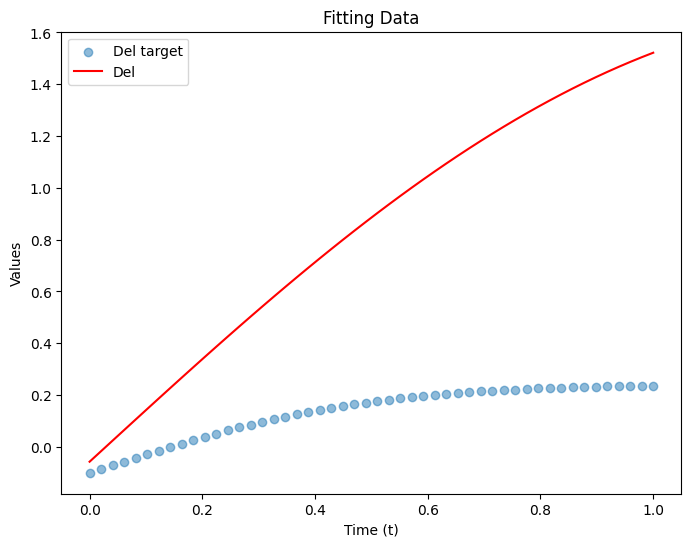

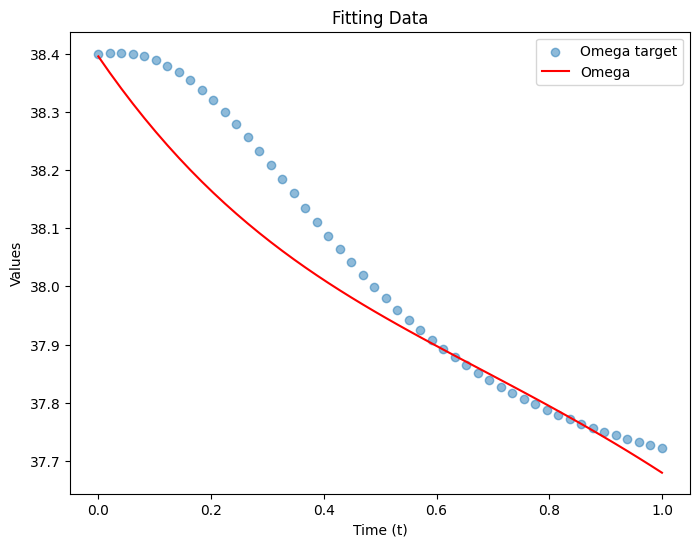

In [10]:
import matplotlib.pyplot as plt

# Plot the target values and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(t_data, del_target_values, label='Del target', alpha=0.5)
fitted_values = f(w1,w2, w3, w4,w5,t_data)
plt.plot(t_data, fitted_values, 'r', label='Del')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')


# Plot the target values and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(t_data, omega_target_values, label='Omega target', alpha=0.5)
fitted_values = f_prime(w1,w2, w3, w4,w5,t_data)+ws
print(fitted_values)
plt.plot(t_data, fitted_values, 'r', label='Omega')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.show()

plt.show()
